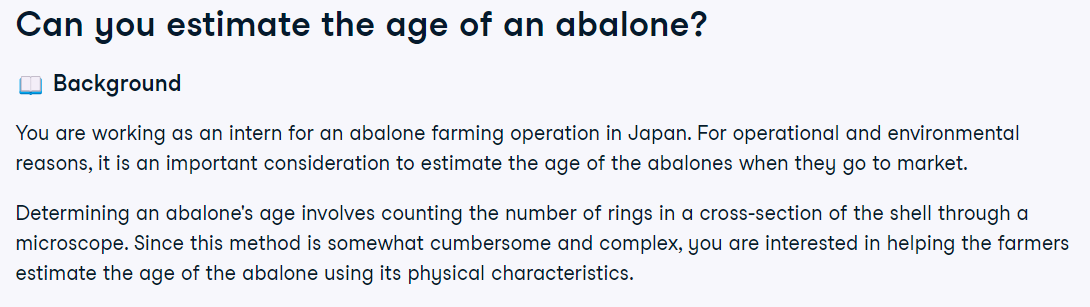
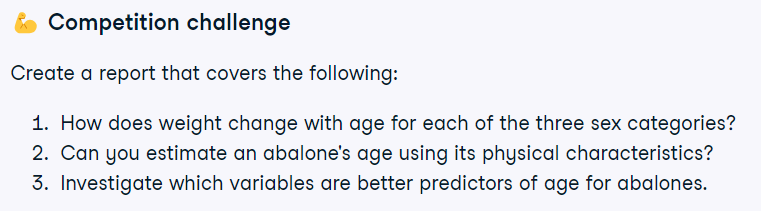

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

## Loading in the Abalone Dataset

In [2]:
df = pd.read_csv(r'C:\Users\abdul\OneDrive\Desktop\Python JP\abalone_dataset_datacamp_competition.csv')
df

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
1995,I,0.320,0.240,0.070,0.1330,0.0585,0.0255,0.0410,6,7.5
1996,I,0.325,0.250,0.070,0.1745,0.0875,0.0355,0.0400,7,8.5
1997,I,0.335,0.250,0.080,0.1695,0.0695,0.0440,0.0495,6,7.5
1998,I,0.350,0.235,0.080,0.1700,0.0725,0.0465,0.0495,7,8.5


## Preliminary Review of Data

<Axes: xlabel='sex', ylabel='age'>

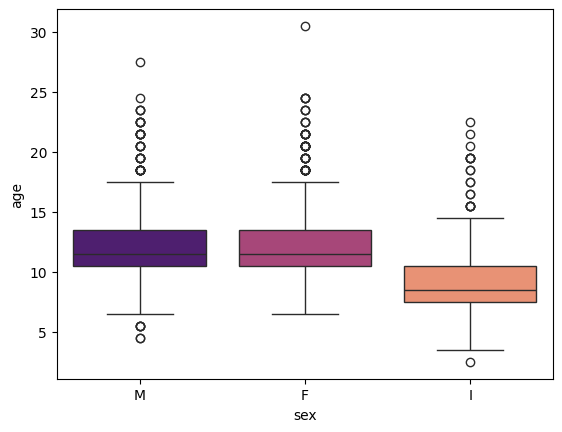

In [3]:
sns.boxplot(data=df,x='sex',y='age',hue='sex',palette='magma')

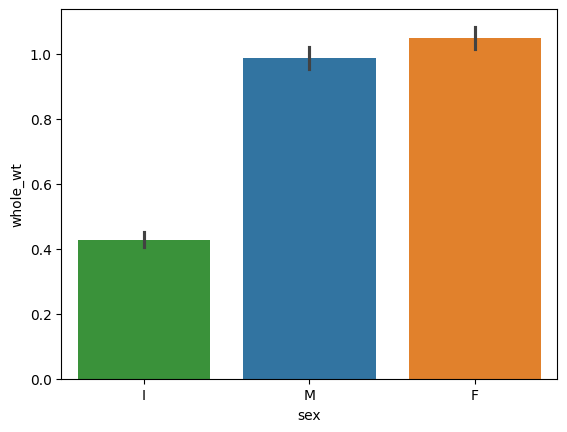

<Axes: xlabel='sex', ylabel='age'>

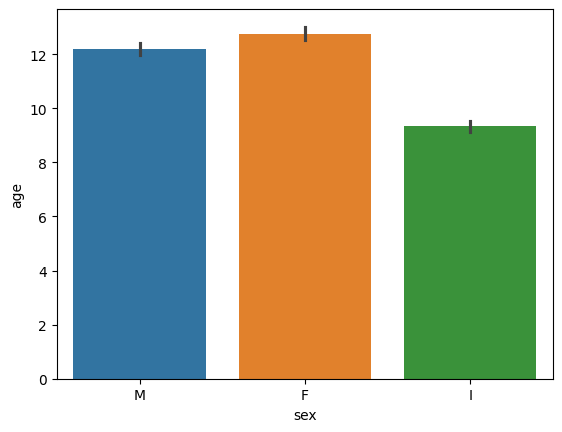

In [4]:
#Plotting Weight by Gender
sns.barplot(data=df,x='sex',y='whole_wt',order=['I','M','F'],hue='sex')
plt.show()
sns.barplot(data=df,x='sex',y='age',hue='sex')

C:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


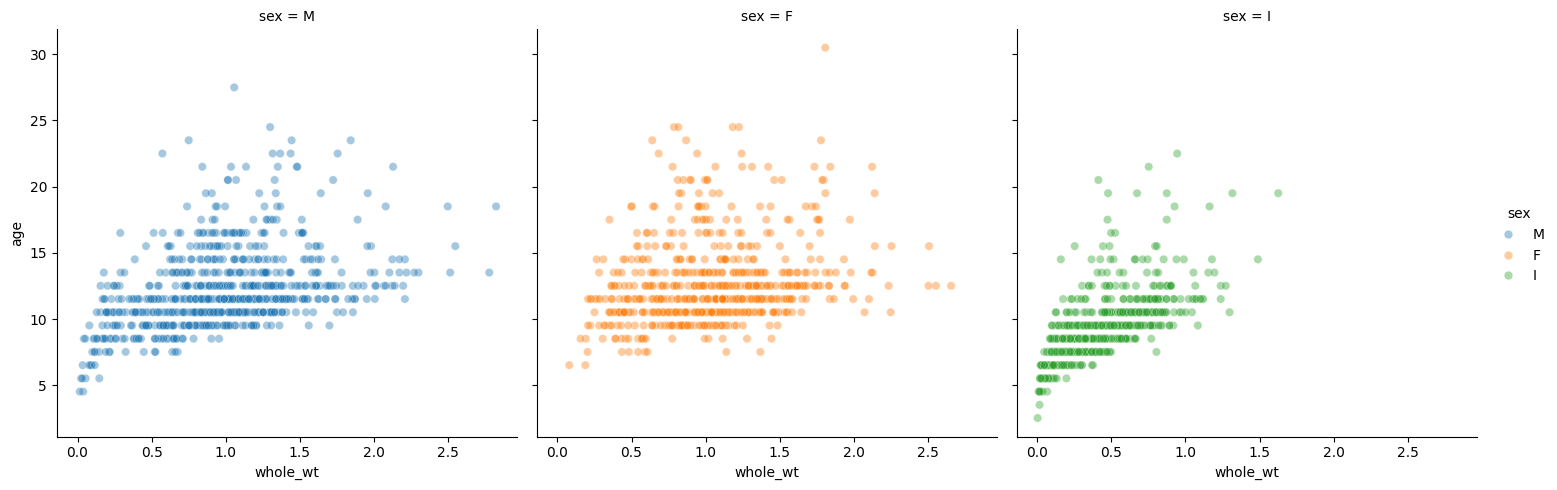

In [5]:
#Plotting a scatter plot to show how age varies by weight for each gender
sns.relplot(data=df,x='whole_wt',y='age',palette='tab10',alpha=0.4,col='sex',hue='sex')
plt.show()

## Exploratory Data Analysis

In [6]:
#determine if the dataset contains any empty columns
empty = []
for column in df.columns:
    empty.append(df[column].isna().sum())
empty
df.isna().sum()

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64

In [7]:
df.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.521827,0.406445,0.138965,0.824126,0.357067,0.179573,0.237436,9.939500,11.439500
std,0.122215,0.101347,0.039700,0.496550,0.226013,0.110361,0.141011,3.320897,3.320897
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.345000,0.115000,0.433875,0.181000,0.092000,0.125000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.800000,0.336000,0.170000,0.234000,9.000000,10.500000
75%,0.610000,0.480000,0.165000,1.137125,0.498125,0.249500,0.325000,11.000000,12.500000
max,0.815000,0.650000,0.515000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


### Correlation Heatmap

In [8]:
df_sex = pd.get_dummies(df['sex'],dtype=int)
df_sex

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
1995,0,1,0
1996,0,1,0
1997,0,1,0
1998,0,1,0


In [9]:
df_x = df.drop(['rings','sex','age'],axis=1)
df_x = df_x.join(df_sex)
df_y = df['age']
df_x

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1995,0.320,0.240,0.070,0.1330,0.0585,0.0255,0.0410,0,1,0
1996,0.325,0.250,0.070,0.1745,0.0875,0.0355,0.0400,0,1,0
1997,0.335,0.250,0.080,0.1695,0.0695,0.0440,0.0495,0,1,0
1998,0.350,0.235,0.080,0.1700,0.0725,0.0465,0.0495,0,1,0


<Axes: >

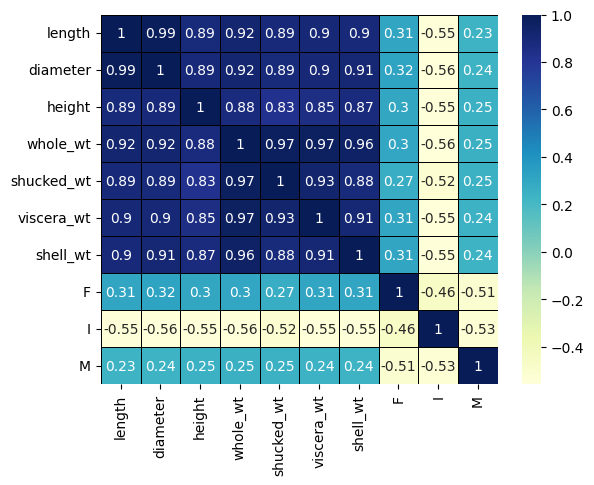

In [10]:
sns.heatmap(df_x.corr(),annot=True,cmap='YlGnBu',linecolor='black',cbar=True,linewidth=0.5)
#Input features are VERY correlated with each other (size ~ wt)

## Training and Testing and Applying the Pre-processing Pipelines

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = df_x
y = df_y
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=True,test_size=0.2)
pipe = Pipeline([('minmax',MinMaxScaler()),('scaler',StandardScaler()),('pca',PCA())])
#fitting and transforming training data with pipeline
X_train_pipe = pipe.fit_transform(X_train)
X_test_pipe = pipe.transform(X_test)
print("The explained variance for the PCs are:",pipe['pca'].explained_variance_ratio_) #the first three PCA components explain ~90% of the variance in the dataset
print(pd.DataFrame(abs(pipe['pca'].components_)))
print(X_train.shape,X_train_pipe.shape,X_test_pipe.shape)
pd.DataFrame(X_train_pipe)

The explained variance for the PCs are: [7.03494302e-01 1.51351706e-01 8.97134512e-02 2.19958632e-02
 1.46368407e-02 1.07791325e-02 6.29848594e-03 1.16684832e-03
 5.63370258e-04 5.77272916e-33]
              0             1             2             3             4  \
0  3.616756e-01  3.626572e-01  3.463123e-01  3.688528e-01  3.560341e-01   
1  2.320893e-02  2.236000e-02  3.309488e-03  6.658578e-03  5.180793e-04   
2  1.212737e-01  1.064984e-01  7.552041e-02  1.301288e-01  1.613167e-01   
3  2.914045e-01  3.185580e-01  6.197119e-01  3.054464e-01  4.589219e-01   
4  5.315123e-01  4.889279e-01  6.047520e-01  1.143626e-01  4.254251e-02   
5  1.872476e-03  7.106816e-02  3.442098e-01  7.055836e-02  3.744745e-01   
6  3.193557e-02  1.657268e-02  7.694627e-02  9.340415e-02  5.965361e-01   
7  6.964208e-01  7.144982e-01  1.358572e-02  2.255347e-02  1.316769e-02   
8  2.230519e-02  1.658838e-02  6.315285e-05  8.522804e-01  3.722061e-01   
9  8.455609e-17  1.642745e-16  9.062262e-17  1.187500e-1

,0,1,2,3,4,5,6,7,8,9
0,-1.394124,-1.494360,-1.127036,-0.243531,-0.510291,-0.202289,0.068067,0.099004,0.011222,2.018838e-15
1,-3.998471,0.198707,0.523197,-0.293209,0.124471,-0.058706,-0.030511,0.002561,0.010739,2.855344e-16
2,1.139522,1.562663,-0.798936,0.349796,-0.029334,0.108161,-0.586638,0.128858,-0.014860,6.505949e-15
3,1.470688,1.573170,-0.667361,0.024930,-0.105291,-0.338361,-0.272607,-0.005579,-0.107056,-3.265751e-17
4,-0.152923,0.312998,1.729789,0.546027,0.521025,0.539375,-0.170285,0.032230,0.111035,4.969510e-16
...,...,...,...,...,...,...,...,...,...,...
1595,2.088022,-1.414507,0.021492,-0.914901,0.495522,0.224242,-0.024068,-0.055964,-0.038525,-1.655941e-16
1596,-2.245550,0.263229,1.095897,-0.039213,-0.448302,0.066372,-0.098459,-0.088463,-0.004122,-3.598956e-17
1597,1.749654,1.585611,-0.599018,0.605190,-0.087033,-0.304717,-0.051891,0.023516,0.099105,1.342833e-17
1598,-4.360775,0.182609,0.402040,-0.347744,0.366760,0.010033,-0.043346,0.056228,-0.000082,9.137239e-17


## Applying Linear Regression Models

### Ridge Regression

In [12]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train_pipe,y_train)
y_pred_ridge = ridge.predict(X_test_pipe)
print(r2_score(y_test,y_pred_ridge),mean_squared_error(y_pred_ridge,y_test)**0.5)

0.5529180359105903 2.3400071711263557


### Lasso Regression

In [13]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(X_train_pipe,y_train)
y_pred_lasso = lasso.predict(X_test_pipe)
r2_score(y_test,y_pred_lasso)
mean_squared_error(y_pred_lasso,y_test)
print(r2_score(y_test,y_pred_lasso),mean_squared_error(y_pred_lasso,y_test)**0.5)

0.3141165487623684 2.8983362955774


### OLS Regression

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_pipe,y_train)
y_pred_lr = lr.predict(X_test_pipe)
r2_score(y_test,y_pred_lr)
mean_squared_error(y_pred_lr,y_test)
print(r2_score(y_test,y_pred_lr),mean_squared_error(y_pred_lr,y_test)**0.5)

0.553844155591596 2.3375822800316355


## Tree-Based Regression Models

### Gradient Boosting Regressor

In [21]:
#The most important features are length, viscera_wt, I, and shucked_wt

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(loss='squared_error',learning_rate=0.1,n_estimators=100,min_samples_split=2,min_samples_leaf=1,max_depth=3)
gbr.fit(X_train_pipe,y_train)
y_pred_gbr = gbr.predict(X_test_pipe)
r2_score(y_test,y_pred_gbr)
mean_squared_error(y_pred_gbr,y_test)
print(r2_score(y_test,y_pred_gbr),mean_squared_error(y_pred_gbr,y_test)**0.5)
gbr_features = pd.DataFrame(gbr.feature_importances_,index = X_train.columns)
gbr_features.columns = ['Importance']
gbr_features.sort_values(by='Importance', ascending=False,axis=0)
#gbr_features.sort_values(by='0', axis=1, ascending=False)

0.5654539560531986 2.306967697503733


,Importance
length,0.483033
viscera_wt,0.172160
I,0.107035
shucked_wt,0.085429
whole_wt,0.059300
shell_wt,0.032296
F,0.026153
height,0.024842
diameter,0.009752
M,0.000000


### AdaBoost Regressor

In [20]:
#The most important features are length, vscera_wt, whole_wt, and shucked_wt

In [16]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(learning_rate=1.0,n_estimators=50)
abr.fit(X_train_pipe,y_train)
y_pred_abr = abr.predict(X_test_pipe)
r2_score(y_test,y_pred_abr)
mean_squared_error(y_pred_abr,y_test)
print(r2_score(y_test,y_pred_abr),mean_squared_error(y_pred_abr,y_test)**0.5)
abr_features = pd.DataFrame(abr.feature_importances_,index = X_train.columns)
abr_features.columns = ['Importance']
abr_features.sort_values(by='Importance', ascending=False,axis=0)

0.41636902087088246 2.6735775225697584


,Importance
length,0.271653
viscera_wt,0.174907
whole_wt,0.159943
shucked_wt,0.128064
I,0.114031
shell_wt,0.068775
diameter,0.037113
F,0.029023
height,0.016490
M,0.000000


## Cross-Validation: KFold and Stratified K Fold

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=True)
gbr_cross_rmse = -cross_val_score(gbr, X=X_train_pipe,y=y_train,cv=10,scoring='neg_root_mean_squared_error')
gbr_cross_r2 = cross_val_score(gbr,X=X_train_pipe,y=y_train,cv=10,scoring='r2')
print('Cross-Val Score:',[gbr_cross_rmse.mean(),gbr_cross_rmse.std()],[gbr_cross_r2.mean(),gbr_cross_r2.std()])
gbr_kf_rmse = -cross_val_score(gbr,X=X_train_pipe,y=y_train,cv=kf,scoring='neg_root_mean_squared_error')
gbr_kf_r2 = cross_val_score(gbr,X=X_train_pipe,y=y_train,cv=kf,scoring='r2')
print('KFold Cross-Val Score:',[gbr_cross_rmse.mean(),gbr_cross_rmse.std()],[gbr_cross_r2.mean(),gbr_cross_r2.std()])

Cross-Val Score: [2.2182004747991835, 0.1421913216644131] [0.5323374615330233, 0.06362823056827602]
KFold Cross-Val Score: [2.2182004747991835, 0.1421913216644131] [0.5323374615330233, 0.06362823056827602]


## Hyperparameter Tuning for Gradient Boosting Regression

In [25]:
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth':list(range(1,10)),'max_features':list(range(1,3)),'max_depth':list(range(1,10)), 'min_samples_split':list(range(1,50))}
rs = RandomizedSearchCV(estimator=gbr, param_distributions=params, cv=kf, n_iter=10)
rs.fit(X_train_pipe,y_train)
y_pred_rs = rs.predict(X_test_pipe)
r2_score(y_test,y_pred_rs)
mean_squared_error(y_pred_rs,y_test)
print(r2_score(y_test,y_pred_rs),mean_squared_error(y_pred_rs,y_test)**0.5)

0.577735689668549 2.274132692177945


In [24]:
rs.best_estimator_

GradientBoostingRegressor(max_depth=4, max_features=1, min_samples_split=16)

In [26]:
rs.best_score_

0.5575942708941247

In [29]:
rs.best_params_

{'min_samples_split': 32, 'max_features': 1, 'max_depth': 5}